In [2]:
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.image as img

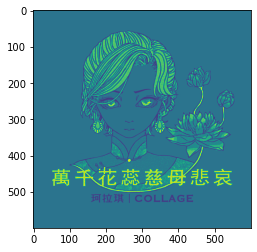

In [3]:
UAna = img.imread('6JqvU4BxhRXAbksr92adzy.jpg')
UAna = np.dot(UAna[...,:3], [0.2989, 0.5870, 0.1140])/256
bc   = UAna[0,0]
UAna[:,0]  = bc
UAna[:,-1] = bc
UAna[0,:]  = bc
UAna[-1,:] = bc

N    = np.shape(UAna)[0]
Dx   = 1/N
F    = np.zeros(np.shape(UAna))
F    = (np.roll(UAna,-1,axis=0)+np.roll(UAna,1,axis=0)+np.roll(UAna,-1,axis=1)+np.roll(UAna,1,axis=1)-4*UAna)/Dx**2

plt.imshow(UAna)
plt.show()
# plt.imshow(F)
# plt.show()

In [4]:
def ItrtJcb(U,F,Dx):
    U_next = (np.roll(U,-1,axis=0)+np.roll(U,1,axis=0)+np.roll(U,-1,axis=1)+np.roll(U,1,axis=1)-Dx**2*F)/4
    return U_next

def ItrtGsd(U,F,Dx):
    Nx = np.shape(U)[1]
    Ny = np.shape(U)[0]
    U_next = U
    for i in range(1,Ny):
        for j in range(1,Nx):
            U_next[i,j] = (U_next[i-1,j]+U[np.mod(i+1,Ny),j]+U_next[i,j-1]+U[i,np.mod(j+1,Nx)]-Dx**2*F[i,j])/4
    return U_next

In [21]:
def ItrtMtg_rsd(U,F,Dx):
    R = (np.roll(U,-1,axis=0)+np.roll(U,1,axis=0)+np.roll(U,-1,axis=1)+np.roll(U,1,axis=1)-4*U)/Dx**2-F
    R[:,0]  = 0
    R[:,-1] = 0
    R[0,:]  = 0
    R[-1,:] = 0
    return R

def ItrtMtg_c2f(U,Ec):
    Ef = np.zeros_like(U)
    Ef[::2,::2]  = Ec
    Ef[1:-1:2,:] = 0.5*(Ef[2::2,:]+Ef[:-2:2,:])
    Ef[:,1:-1:2] = 0.5*(Ef[:,2::2]+Ef[:,:-2:2])
    return Ef

def ItrtMtg(U,F,Dx,bc=0):
    s = 5
    for r in range(s):
        U = ItrtGsd(U,F,Dx)
        U[:,0]  = bc
        U[:,-1] = bc
        U[0,:]  = bc
        U[-1,:] = bc
    R  = ItrtMtg_rsd(U,F,Dx)
    Rc = R[::2,::2]
    if np.max(np.shape(Rc))-1 > 2:
        Ec = ItrtMtg(np.zeros_like(Rc),Rc,Dx*2)
    else:
        Ec = ItrtGsd(np.zeros_like(Rc),Rc,Dx*2)
    E = ItrtMtg_c2f(U,Ec)
    U = U-E
    for r in range(s):
        U = ItrtGsd(U,F,Dx)
        U[:,0]  = bc
        U[:,-1] = bc
        U[0,:]  = bc
        U[-1,:] = bc
    U_next = U
    return U_next

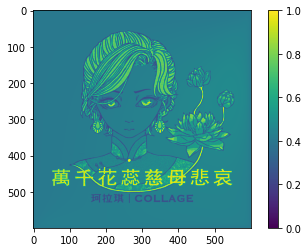

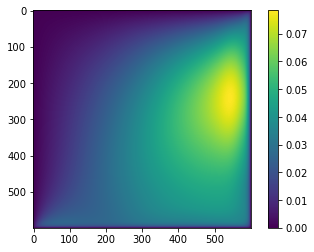

In [27]:
UMtg = np.ones(np.shape(F))*0.5
for r in range(3):
    UMtg = ItrtMtg(UMtg,F,Dx,bc)

plt.imshow(UMtg)
plt.clim(0,1)
plt.colorbar()
plt.show()
EMtg = np.mean((UMtg-UAna)**2)
plt.imshow(UMtg-UAna)
plt.colorbar()
plt.show()

In [32]:
# UGsd = np.ones(np.shape(F))*0.5
# for r in range(20):
#     UGsd = ItrtGsd(UGsd,F,Dx)
#     UGsd[:,0]  = bc
#     UGsd[:,-1] = bc
#     UGsd[0,:]  = bc
#     UGsd[-1,:] = bc

UJcb = np.ones(np.shape(F))*0.5
for r in range(16000):
    UJcb = ItrtJcb(UJcb,F,Dx)
    UJcb[:,0]  = bc
    UJcb[:,-1] = bc
    UJcb[0,:]  = bc
    UJcb[-1,:] = bc

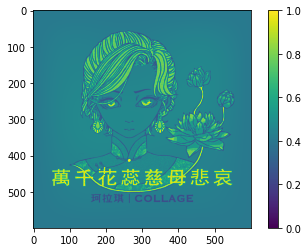

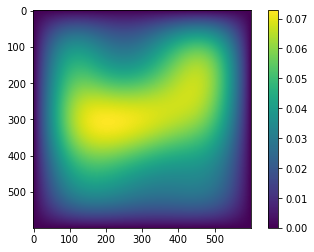

In [33]:
# EGsd = np.mean((UGsd-UAna)**2)
# plt.imshow(UGsd)
# plt.clim(0,1)
# plt.colorbar()
# plt.show()

EJcb = np.mean((UJcb-UAna)**2)
plt.imshow(UJcb)
plt.clim(0,1)
plt.colorbar()
plt.show()
plt.imshow(UJcb-UAna)
plt.colorbar()
plt.show()